In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors
import warnings
from sklearn.datasets import make_blobs
from sklearn.cluster import spectral_clustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import euclidean_distances

In [2]:
## 设置属性防止中文乱码及拦截异常信息
mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False
warnings.filterwarnings('ignore', category=FutureWarning)

In [3]:
## 创建模拟数据
n_samples = 1000
centers = [[1, 2], [-1, -1], [1, -1], [-1, 1]]
#数据1:符合高斯分布的数据集
data1, y1 = make_blobs(n_samples, n_features=2, centers=centers, cluster_std=(0.75,0.5,0.3,0.25), random_state=40)
data1 = StandardScaler().fit_transform(data1)
dist1 = euclidean_distances(data1, squared=True)
# 权重计算公式
affinity_params1 = map(lambda x: (x,np.exp(-dist1 ** 2 / (x ** 2)) + 1e-6), np.logspace(-2,0,5))

#数据2:圆形数据集
t = np.arange(0, 2 * np.pi, 0.1)
data2_1 = np.vstack((np.cos(t), np.sin(t))).T
data2_2 = np.vstack((2*np.cos(t), 2*np.sin(t))).T
data2_3 = np.vstack((3*np.cos(t), 3*np.sin(t))).T
data2 = np.vstack((data2_1, data2_2, data2_3))
y2 = np.vstack(([0] * len(data2_1), [1] * len(data2_2), [2] * len(data2_3)))
## 数据2的参数
dist2 = euclidean_distances(data2, squared=True)
affinity_params2 = map(lambda x: (x, np.exp(-dist2 ** 2 / (x ** 2)) + 1e-6), np.logspace(-2,0,5))

datasets = [(data1, y1, affinity_params1), (data2, y2, affinity_params2)]

类别: [0 1 2 3] ；聚类簇数目: 4
类别: [0 1 2 3] ；聚类簇数目: 4
类别: [0 1 2 3] ；聚类簇数目: 4
类别: [0 1 2 3] ；聚类簇数目: 4
类别: [0 1 2 3] ；聚类簇数目: 4


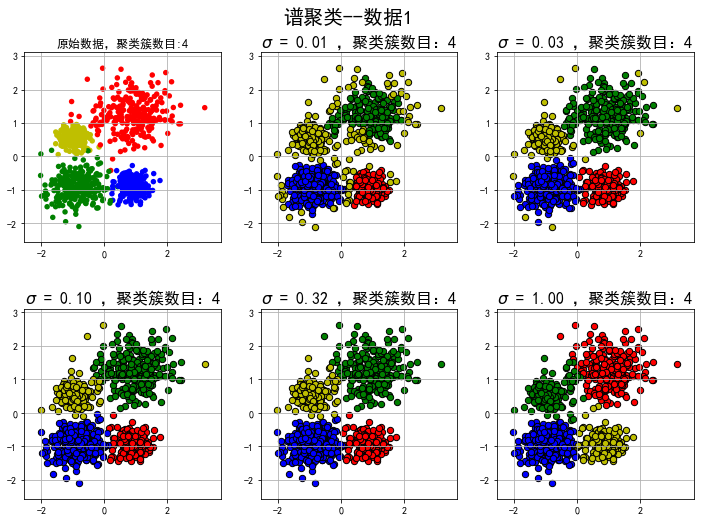

类别: [0 1 2] ；聚类簇数目: 3
类别: [0 1 2] ；聚类簇数目: 3
类别: [0 1 2] ；聚类簇数目: 3
类别: [0 1 2] ；聚类簇数目: 3
类别: [0 1 2] ；聚类簇数目: 3


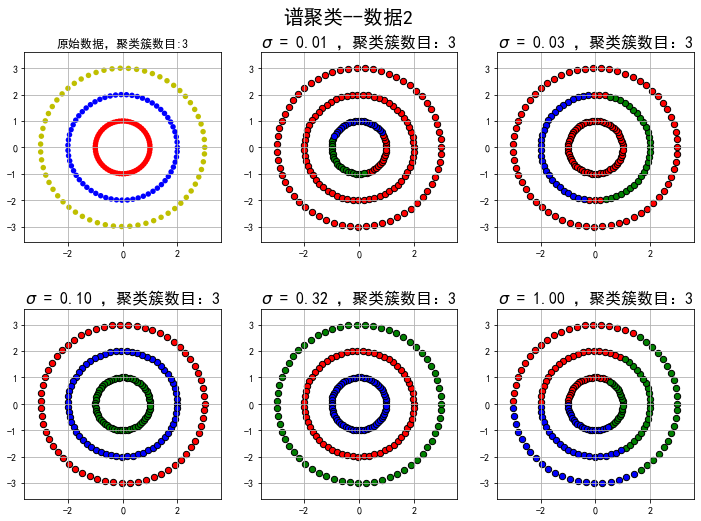

In [4]:
def expandBorder(a, b):
    d = (b - a) * 0.1
    return a-d, b+d

colors = ['r', 'g', 'b', 'y']
cm = mpl.colors.ListedColormap(colors)

for i,(X, y, params) in enumerate(datasets):
    x1_min, x2_min = np.min(X, axis=0)
    x1_max, x2_max = np.max(X, axis=0)
    x1_min, x1_max = expandBorder(x1_min, x1_max)
    x2_min, x2_max = expandBorder(x2_min, x2_max)
    n_clusters = len(np.unique(y))
    plt.figure(figsize=(12, 8), facecolor='w')
    plt.suptitle(u'谱聚类--数据%d' % (i+1), fontsize=20)
    plt.subplots_adjust(top=0.9,hspace=0.35)
    
    plt.subplot(2,3,1)
    plt.scatter(X[:, 0], X[:, 1], c=y.flat, s=30, cmap=cm, edgecolors='none')
    plt.xlim((x1_min, x1_max))
    plt.ylim((x2_min, x2_max))
    plt.title('原始数据，聚类簇数目:%d' % len(np.unique(y)))
    plt.grid(True)

    for j,param in enumerate(params):
        sigma,af = param
        #谱聚类的建模
        ## af: 指定相似度矩阵构造方式(就是相似度矩阵)
        y_hat = spectral_clustering(af, n_clusters=n_clusters, assign_labels='kmeans', random_state=28)
        unique_y_hat = np.unique(y_hat)
        n_clusters = len(unique_y_hat) - (1 if -1 in y_hat else 0)
        print ("类别:",unique_y_hat,"；聚类簇数目:",n_clusters)
        
        ## 开始画图
        plt.subplot(2,3,j+2)
        for k, col in zip(unique_y_hat, colors):
            cur = (y_hat == k)
            plt.scatter(X[cur, 0], X[cur, 1], s=40, c=col, edgecolors='k')
        plt.xlim((x1_min, x1_max))
        plt.ylim((x2_min, x2_max))
        plt.grid(True)
        plt.title('$\sigma$ = %.2f ，聚类簇数目：%d' % (sigma, n_clusters), fontsize=16)
    
    plt.show()